# Chapter 2.2. - Data Analysis

In this JupyterNotebook, the code for the load profile visualisation for Chapter 2.2.1 and the yearly load profile clustering for Chapter 2.2.2. is provided.

## Step 1: Load Profile Visualization 

In [90]:
# Import Python libraries
import time
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import datetime
import random
from statsmodels.tsa.seasonal import STL

# Import the cleaned, normalized and averaged household data
hh = pd.read_pickle('Data/households_cleaned_2016_n=5000_normalized.pkl').T
# hh.columns = hh.columns.droplevel('Day')

hh

Day                          2016-01-01                      \
Time                2016-01-01 00:30:00 2016-01-01 01:00:00   
Household-IDs                                                 
1000598030948301               0.000085            0.000073   
1000603359453290               0.000063            0.000037   
1000637883689223               0.000054            0.000049   
1000640372894830               0.000077            0.000079   
1000653299323992               0.000010            0.000006   
...                                 ...                 ...   
1000656127142814464            0.000046            0.000093   
1000656197299123584            0.000010            0.000021   
1000656461793978880            0.000042            0.000053   
1000657432711005824            0.000172            0.000182   
1000664256813090304            0.000079            0.000043   

Day                                                          \
Time                2016-01-01 01:30:00 2016-01-01 02:00:00   
Household-IDs                                                 
1000598030948301               0.000076            0.000046   
1000603359453290               0.000028            0.000024   
1000637883689223               0.000050            0.000042   
1000640372894830               0.000077            0.000081   
1000653299323992               0.000010            0.000008   
...                                 ...                 ...   
1000656127142814464            0.000023            0.000020   
1000656197299123584            0.000006            0.000019   
1000656461793978880            0.000055            0.000051   
1000657432711005824            0.000202            0.000169   
1000664256813090304            0.000049            0.000046   

Day                                                          \
Time                2016-01-01 02:30:00 2016-01-01 03:00:00   
Household-IDs                                                 
1000598030948301               0.000012            0.000040   
1000603359453290               0.000029            0.000054   
1000637883689223               0.000048            0.000047   
1000640372894830               0.000072            0.000070   
1000653299323992               0.000008            0.000010   
...                                 ...                 ...   
1000656127142814464            0.000018            0.000018   
1000656197299123584            0.000015            0.000010   
1000656461793978880            0.000033            0.000050   
1000657432711005824            0.000151            0.000096   
1000664256813090304            0.000046            0.000044   

Day                                                          \
Time                2016-01-01 03:30:00 2016-01-01 04:00:00   
Household-IDs                                                 
1000598030948301               0.000016            0.000031   
1000603359453290               0.000016            0.000015   
1000637883689223               0.000099            0.000058   
1000640372894830               0.000021            0.000015   
1000653299323992               0.000006            0.000010   
...                                 ...                 ...   
1000656127142814464            0.000019            0.000018   
1000656197299123584            0.000021            0.000006   
1000656461793978880            0.000046            0.000046   
1000657432711005824            0.000067            0.000035   
1000664256813090304            0.000044            0.000043   

Day                                                          ...  \
Time                2016-01-01 04:30:00 2016-01-01 05:00:00  ...   
Household-IDs                                                ...   
1000598030948301               0.000024            0.000024  ...   
1000603359453290               0.000015            0.000015  ...   
1000637883689223               0.000050            0.000025  ...   
1000640372894830               0.000017            0.000011 

#### Yearly Visualization

In [ ]:
import random

# Draw a random sample of load profiles to be visualized
sample_ids = random.sample(hh.index.tolist(), 6)

<Figure size 6000x4000 with 0 Axes>

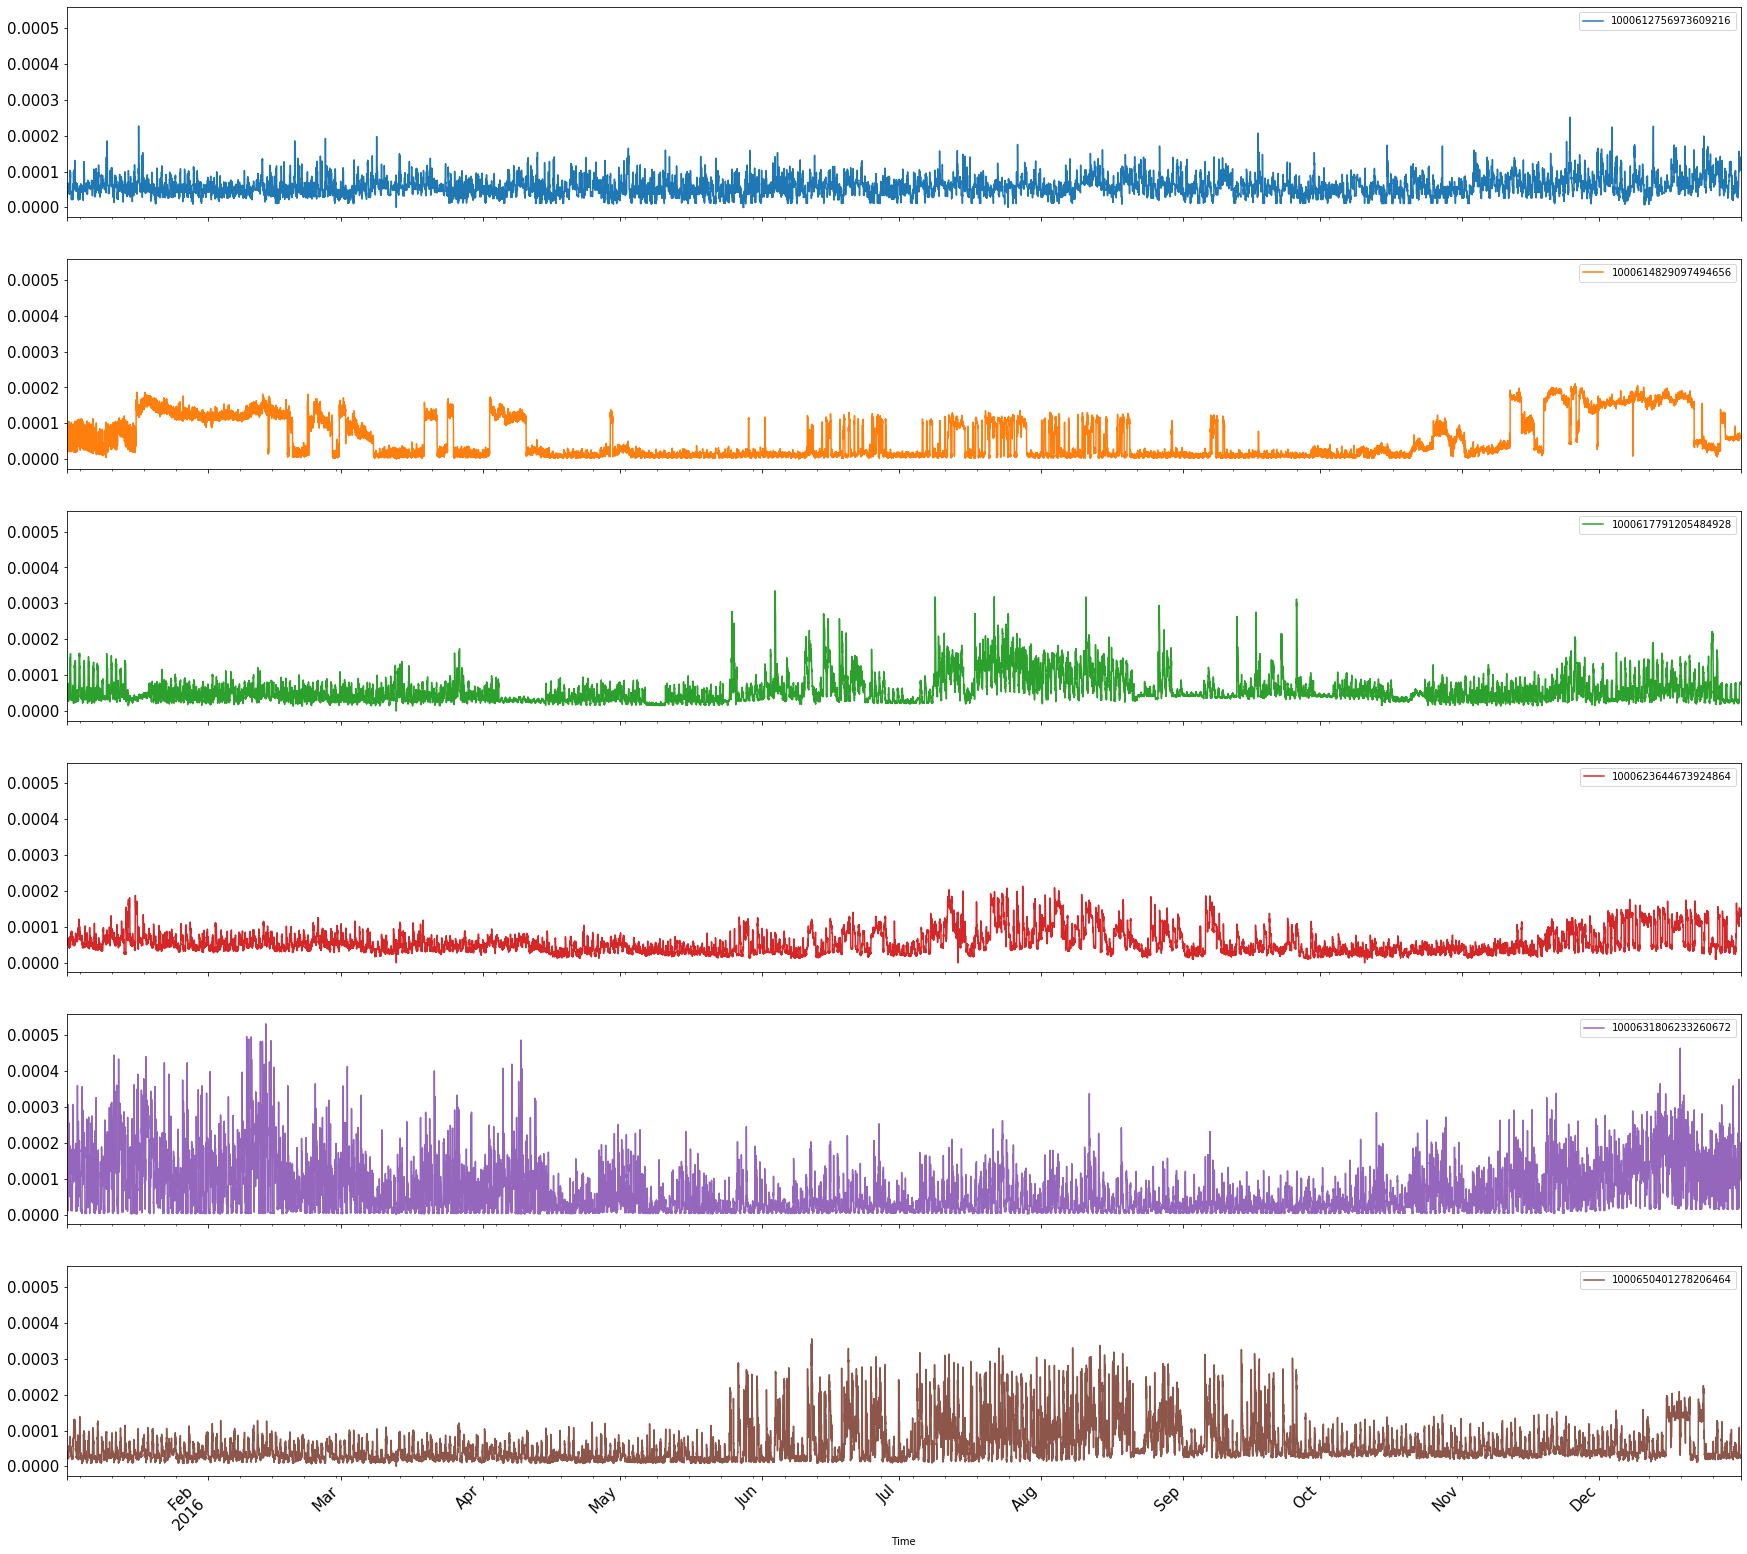

In [104]:
# Plot the yearly load profiles of the randomly drawn sample
hh_sample = hh[hh.index.isin(sample_ids)].T
hh_sample.index = hh_sample.index.droplevel('Day')
plt.figure(dpi=1000)
hh_sample.plot.line(subplots=True, 
                   #xticks=hh_sample.index.droplevel('Day'),
                   grid=False,
                   figsize=(30,30),
                   fontsize=15,
                   rot=45,
                   sharey=True,
                   sharex=True)
plt.show()

#### Daily Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207782EF408>,
      dtype=object)

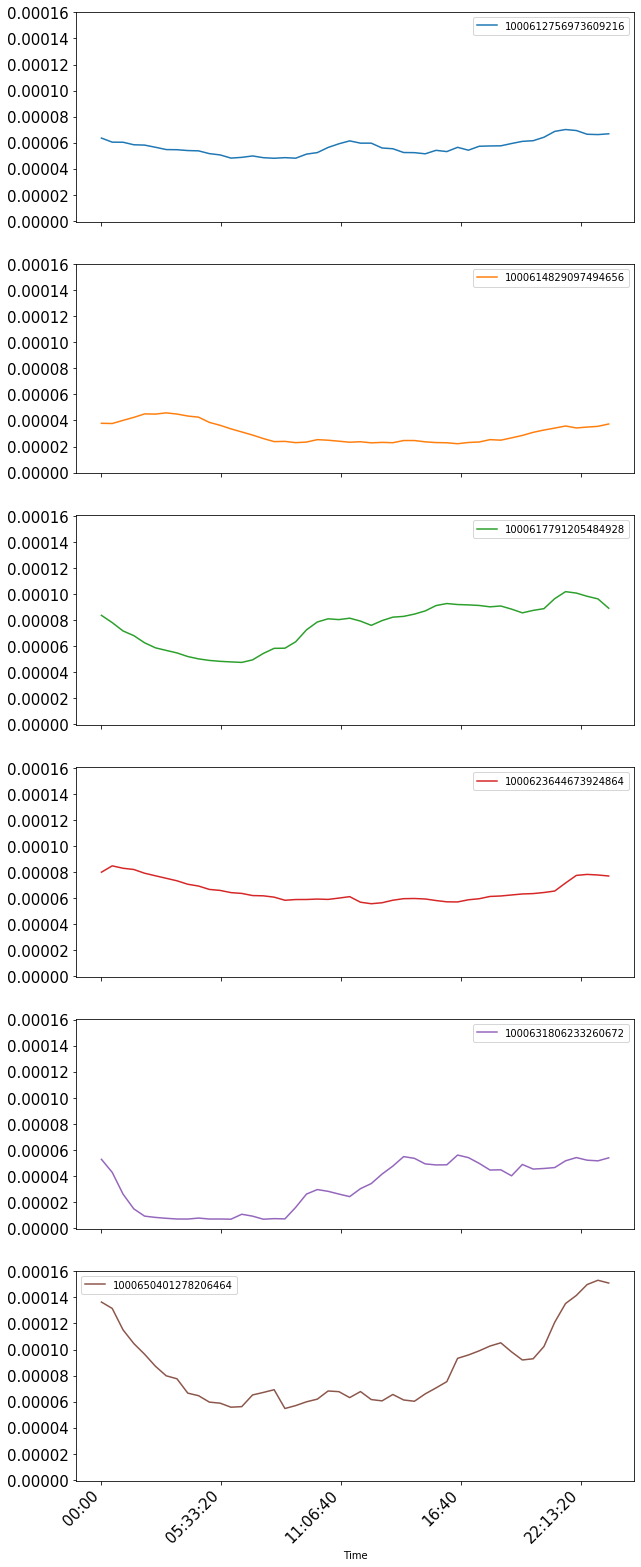

In [118]:
# Plot the daily average load profiles of the randomly drawn sample for summer months
hh_sample_summer = hh_sample[hh_sample.index.month.isin([6,7,8,9])]
hh_sample_summer.groupby(hh_sample_summer.index.map(lambda idx : idx.time())).mean().plot.line(subplots=True, 
                                                                                               grid=False,
                                                                                               figsize=(10,30),
                                                                                               fontsize=15,
                                                                                               rot=45,
                                                                                               sharey=True,
                                                                                               sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002077322D708>,
      dtype=object)

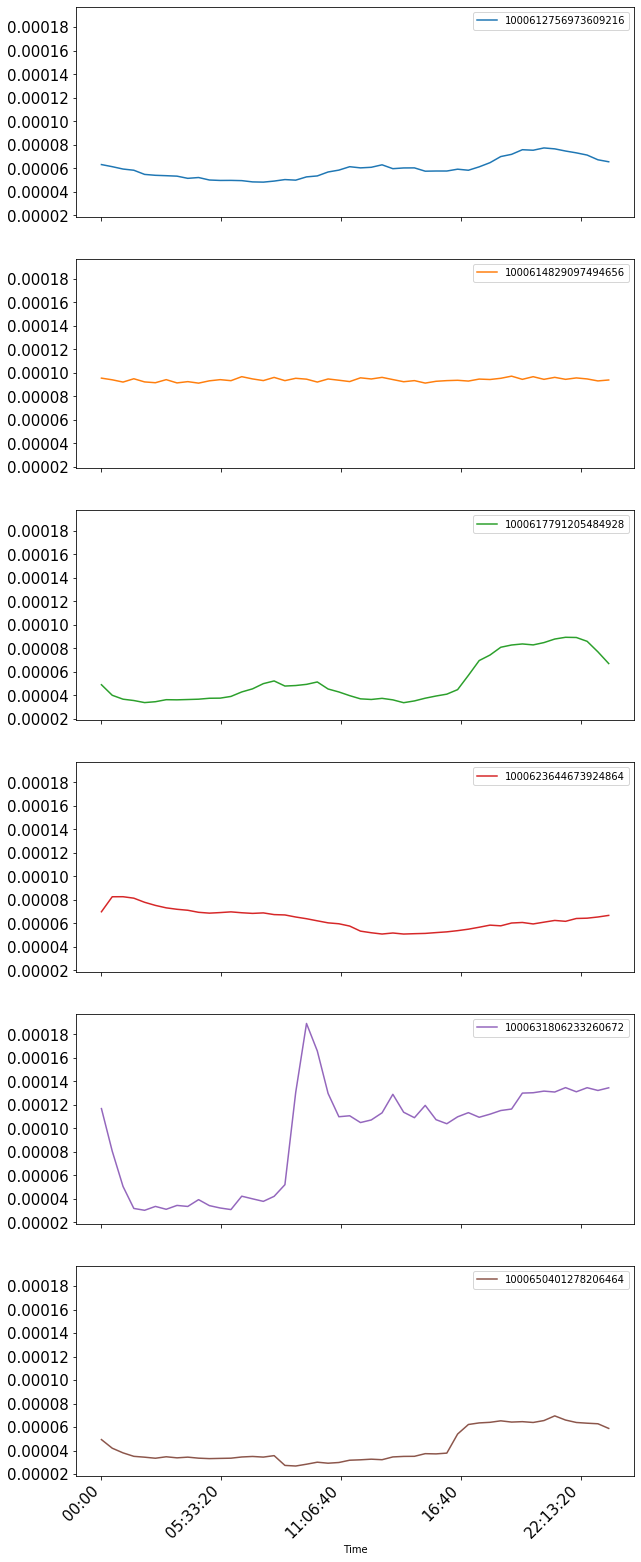

In [120]:
# Plot the daily average load profiles of the randomly drawn sample for winter months
hh_sample_winter = hh_sample[hh_sample.index.month.isin([12,1,2,3])]
hh_sample_winter.groupby(hh_sample_winter.index.map(lambda idx : idx.time())).mean().plot.line(subplots=True, 
                                                                                               grid=False,
                                                                                               figsize=(10,30),
                                                                                               fontsize=15,
                                                                                               rot=45,
                                                                                               sharey=True,
                                                                                               sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207673B7B48>,
      dtype=object)

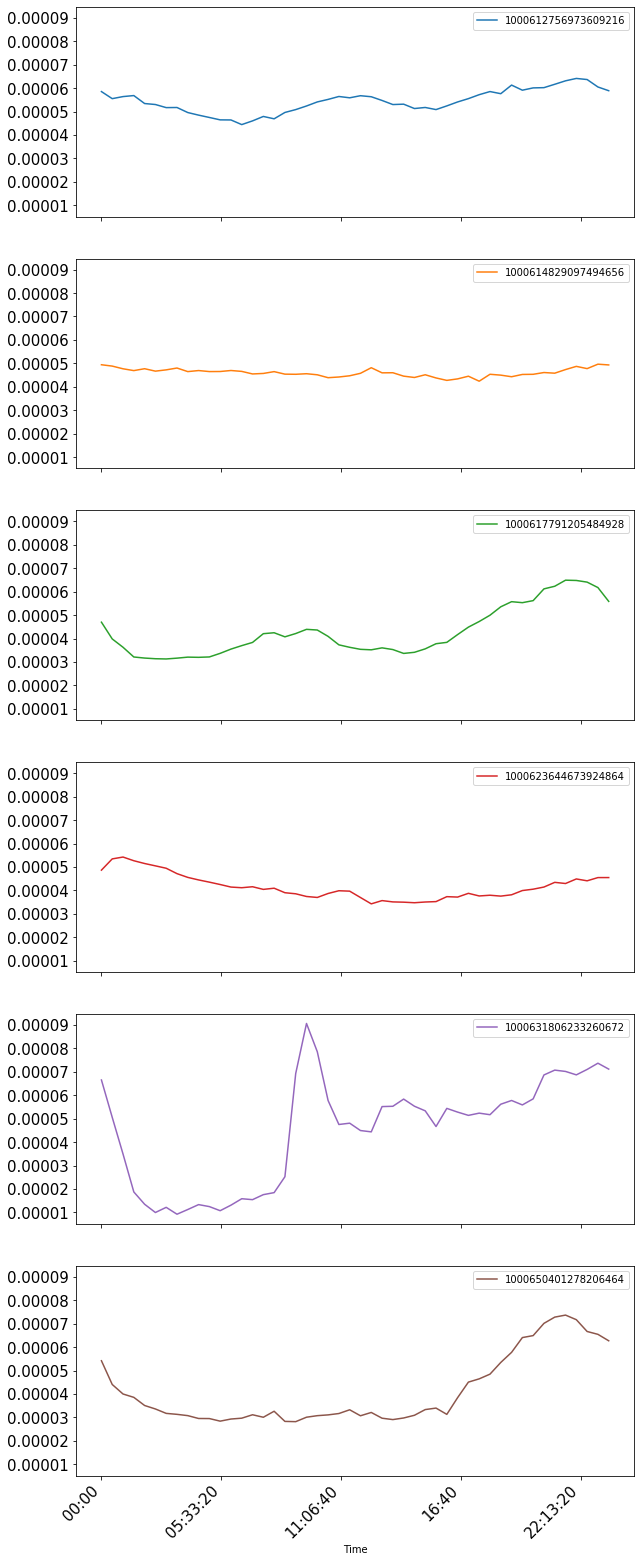

In [122]:
# Plot the daily average load profiles of the randomly drawn sample for spring and autumn months
hh_sample_autumn = hh_sample[hh_sample.index.month.isin([4,5,10,11])]
hh_sample_autumn.groupby(hh_sample_autumn.index.map(lambda idx : idx.time())).mean().plot.line(subplots=True, 
                                                                                               grid=False,
                                                                                               figsize=(10,30),
                                                                                               fontsize=15,
                                                                                               rot=45,
                                                                                               sharey=True,
                                                                                               sharex=True)

#### Normal Load Profile vs. STL-Smoothing Visualization

In [3]:
from statsmodels.tsa.seasonal import STL
from matplotlib import pyplot as plt
import pandas as pd

# Apply STL smoothing to one of the randomly sample load profiles
hh_sample = pd.read_pickle('Data/households_cleaned_2016_n=5000_normalized.pkl')['1000631806233260672'].T
hh_sample.index = hh_sample.index.droplevel('Day')
hh_sample_stl = pd.Series(STL(hh_sample, period=48).fit().trend, name='1000631806233260672_STL')

# Plot the yearly load profile with and without STL smoothing
plt.figure(dpi=1000)
hh_sample.T.plot.line(grid=False, figsize=(30,10), fontsize=15, rot=45, sharey=True, sharex=True)
hh_sample_stl.T.plot.line(grid=False, figsize=(30,10), fontsize=15, rot=45, sharey=True, sharex=True, linewidth=6)
plt.show()

## Step 2: Clustering of Yearly Load Profiles

#### Utility Functions

In [6]:
"""
Format and visualize the cluster centers of a fitted KMeans-Model
@param df: Input-DataFrame used for the KMeans model
@param kmeans_model: KMeans model, fitted on df
@return: formatted cluster centers in a DataFrame
"""
def plot_kmeans_cluster_centers(df, kmeans_model):
    
    # Store the Cluster Centers in a DataFrame 
    result = pd.DataFrame(data=kmeans_model.cluster_centers_, 
                          index=range(0,len(kmeans_model.cluster_centers_)), 
                          columns=df.columns)
    result.index.name = 'Cluster'
  
    # Visualize the Cluster Centers
    plt.figure(dpi=1000)
    result.plot.line(subplots=True, 
                       xticks=df.columns,
                       grid=False,
                       figsize=(30,30),
                       fontsize=15,
                       rot=45,
                       sharey=True,
                       sharex=True)
    plt.title("$k$-Means Cluster Centers for $k$=4")
    plt.show()
    return result

"""
Transform a set of Load Profile Time Series into the underlying trend,
using the "Season-Trend-Decomposition using LOESS" Algorithm
@param data: Input-DataFrame
@param period: Periodicity for the STL calculation
@return: Transformed DataFrame
"""
from statsmodels.tsa.seasonal import STL
def load_profile_trend_decomposition(data, period):
    
    start_time = time.time()
    
    # Replace each Load Profile Time Series with their Trend Component 
    for i in range(0,len(data.index)):
        data.iloc[i] = STL(data.iloc[i], period=period).fit().trend
    
    print('Finished - Runtime: {:.2} Minutes'.format((time.time() - start_time)/60))
    
    return data

#### Seasonal-Trend Decomposition (STL)

In [1]:
# Import required Python modules and data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import time

hh = pd.read_pickle('Data/households_cleaned_2016_n=5000_normalized.pkl')

print('Starting Decomposition')
start_time = time.time()

# Use the utility function defined above to STL-smoothing the load profiles
hh_trend = load_profile_trend_decomposition(data=hh, period=48)

# Save the results for later applications
hh_trend.to_pickle('Data/households_cleaned_2016_n=5000_normalized_stl.pkl')

print('Decomposition Finished - Runtime: {:.2} Minutes'.format((time.time() - start_time)/60))

#### $k$-Means Clustering

In [ ]:
# Import required Python modules and data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import time

hh_trend = pd.read_pickle('Data/households_cleaned_2016_n=5000_normalized_stl.pkl')

print('Starting Elbow Method')
start_time = time.time()

# Define a storage list for the different WCSS values and the range of k to be analyzed
inertia = []
k_range = range(1,11)

# Fit a KMeans model on the different values of k and save the results
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=1000).fit(hh_trend)
    inertia.append(km.inertia_)

print('Finished - Runtime: {:.2} Minutes'.format((time.time() - start_time)/60))

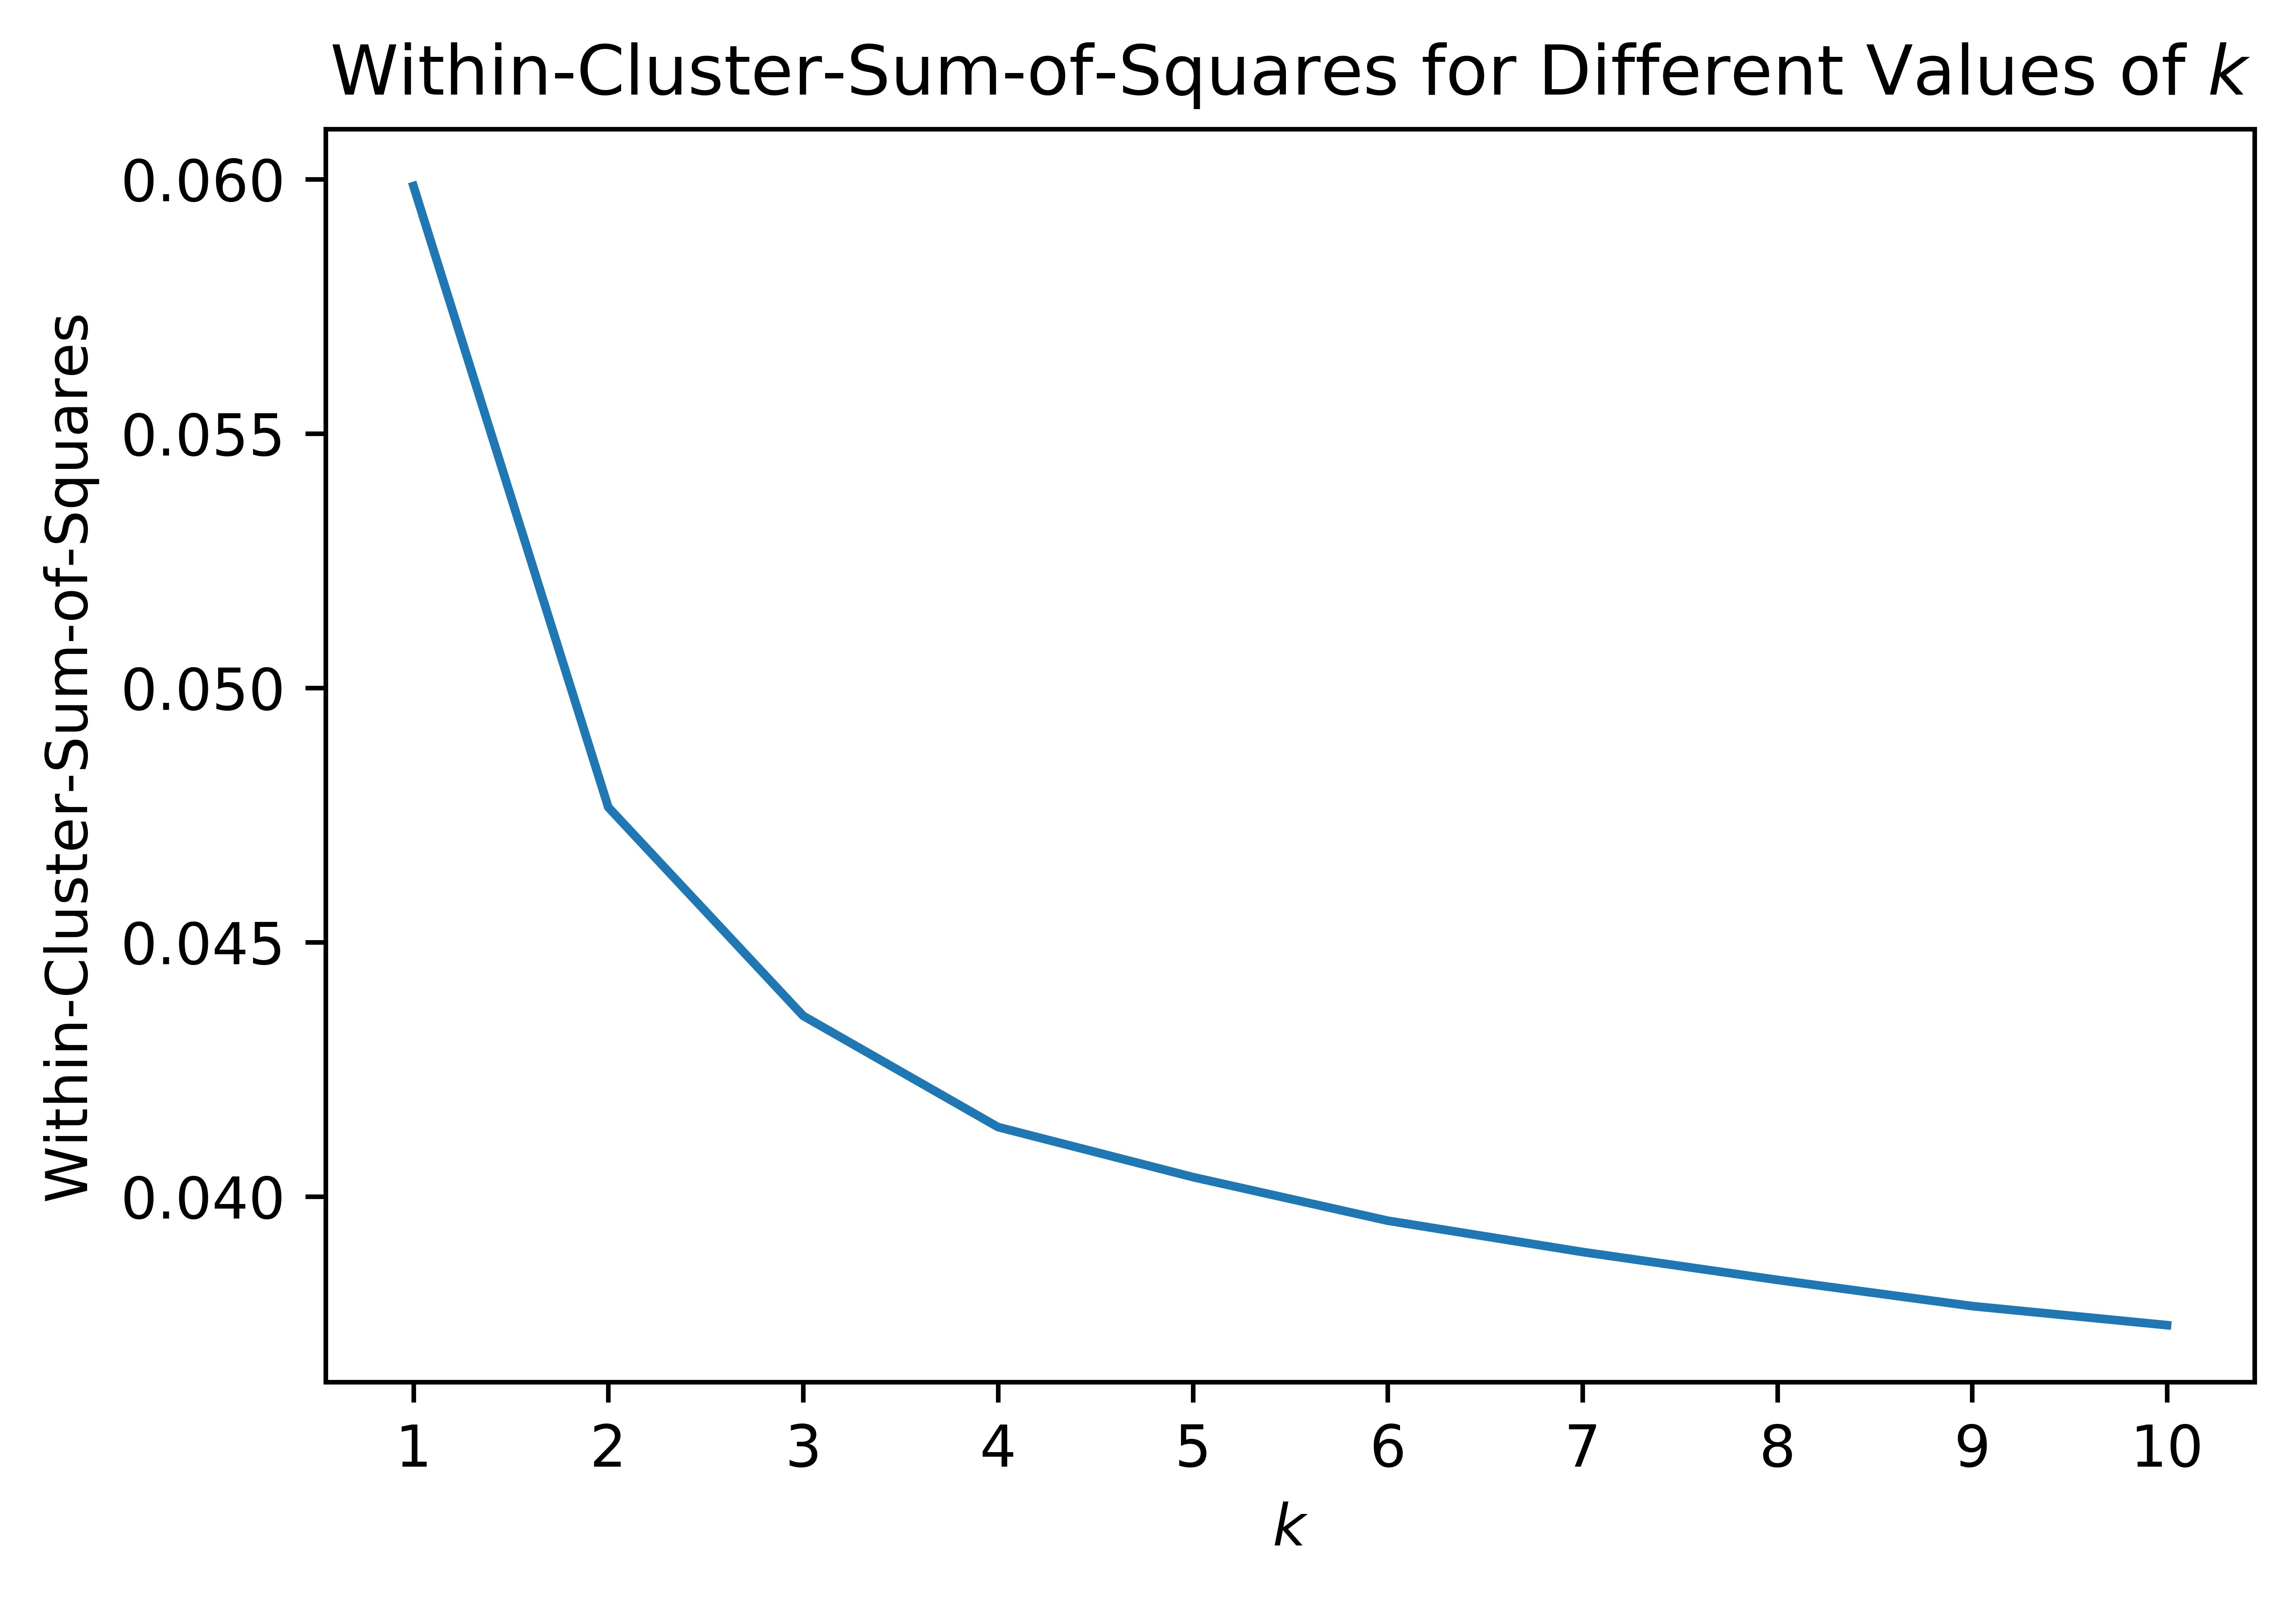

In [7]:
# Plot the evolution of WCSS with increasing k
plt.figure(dpi=1000)
plt.title("Within-Cluster-Sum-of-Squares for Different Values of $k$")
plt.plot(k_range, inertia)
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.xlabel("$k$")
plt.xticks(k_range)
plt.show()

In [8]:
# Import required Python modules and data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import time

hh_trend = pd.read_pickle('Data/households_cleaned_2016_n=5000_normalized_stl.pkl')

# Set the value of k to the "elbow" identified in the elbow method above
k=4

# Create and train a KMeans model with the found value of k
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=1000, n_jobs=1).fit(hh_trend)

In [ ]:
# Visualize the clustering results with the utility function defined above
kmeans_cluster = plot_kmeans_cluster_centers(hh_trend, kmeans_model)

# Print the sizes of the created clusters
print('Distribution of Clusters:\n{}'.format(pd.Series(kmeans_model.labels_).value_counts().sort_index()))